In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1-2KWCl99n5s3A66EE2bEq9PxWixkhZi6
!gdown 1-2JCMa7ymGZjHrWB4JiECDMIkI10Zz0J

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1-2KWCl99n5s3A66EE2bEq9PxWixkhZi6
To: /content/Normal.csv
100% 3.22M/3.22M [00:00<00:00, 136MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-2JCMa7ymGZjHrWB4JiECDMIkI10Zz0J
To: /content/Fault.csv
100% 1.62M/1.62M [00:00<00:00, 87.6MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
normal_bearings_data = pd.read_csv('/content/Normal.csv')
faulty_bearings_data = pd.read_csv('/content/Fault.csv')

# Function to select M samples of length N from the dataset
def select_samples(data, M, N, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    samples = []
    for _ in range(M):
        start_index = np.random.randint(0, len(data) - N)
        sample = data[start_index:start_index + N]
        samples.append(sample)
    return np.array(samples)

M = 200
N = 300
normal_samples = select_samples(normal_bearings_data, M, N, 64)
faulty_samples = select_samples(faulty_bearings_data, M, N, 64)

labels_normal = np.zeros(M)
labels_faulty = np.ones(M)

normal_samples_flat = normal_samples.reshape(M, -1)
faulty_samples_flat = faulty_samples.reshape(M, -1)

data_combined = np.vstack((normal_samples_flat, faulty_samples_flat))

labels_combined = np.concatenate((labels_normal, labels_faulty))

df = pd.DataFrame(data_combined)
df['label'] = labels_combined

df


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,-0.184833,-0.159591,-0.107437,-0.046313,0.031084,0.071972,0.105351,0.100344,0.077188,0.027954,...,-0.040889,-0.007302,0.017941,0.015229,-0.024617,-0.070303,-0.099927,-0.097632,-0.085950,0.0
1,0.165849,0.162929,0.141650,0.101596,0.061124,0.066131,0.065922,0.067800,0.048399,0.033587,...,0.124752,0.131845,0.097841,0.027120,-0.013769,-0.029415,-0.023991,-0.021279,-0.034004,0.0
2,0.076979,0.113487,0.126421,0.098466,0.053614,0.018775,0.006676,0.016272,0.008345,0.002921,...,0.023991,0.070303,0.081151,0.054240,0.017524,-0.010639,-0.001252,0.015229,0.011057,0.0
3,0.079691,0.087618,0.060707,0.011474,-0.012100,0.010014,0.026911,0.035673,0.025034,0.003755,...,-0.041723,-0.014603,-0.015438,-0.004590,0.031084,0.084072,0.113278,0.120371,0.090956,0.0
4,0.015855,0.034422,0.058412,0.049859,0.042975,0.067591,0.098884,0.125795,0.103056,0.056743,...,-0.073224,-0.035673,0.015855,0.063002,0.102013,0.129342,0.141024,0.136434,0.091582,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.016731,-0.147816,0.027127,0.152851,-0.014782,-0.110943,0.112568,0.057989,-0.150577,-0.101847,...,-0.102984,0.236668,0.251937,-0.159349,-0.092426,0.269480,0.088690,-0.005035,0.273541,1.0
396,-0.114517,-0.124588,-0.076994,0.113705,0.065786,-0.326982,-0.475123,-0.257785,0.580218,0.900378,...,-0.065461,0.124425,-0.038660,0.016244,0.101684,-0.073096,-0.158699,-0.111268,-0.155288,1.0
397,0.615467,-0.165034,-0.191186,0.718126,0.024040,-0.923119,-0.186151,0.528239,-0.168283,-0.504686,...,0.139207,0.082842,0.115329,0.037523,-0.170070,-0.005035,0.446209,0.459854,-0.078619,1.0
398,-0.174455,-0.323246,-0.169420,0.145867,0.139694,-0.115979,-0.018842,0.224485,0.127349,-0.104933,...,-0.076182,-0.131572,-0.262008,-0.091776,0.226597,0.242353,0.141156,0.075207,-0.026964,1.0


In [5]:
def standard_deviation(x):
    return np.sqrt(np.sum((x - np.mean(x))**2) / len(x))

def peak(x):
    return np.max(np.abs(x))

def skewness(x):
    return np.sum((x - np.mean(x))**3) / (len(x) * standard_deviation(x)**3)

def kurtosis(x):
    return np.sum((x - np.mean(x))**4) / (len(x) * standard_deviation(x)**4)

def crest_factor(x):
    return peak(x) / np.sqrt(np.mean(x**2))

def clearance_factor(x):
    return peak(x) / np.mean(np.sqrt(np.abs(x)))

def peak_to_peak(x):
    return np.max(x) - np.min(x)

def shape_factor(x):
    return np.sqrt(np.mean(x**2)) / np.mean(np.abs(x))

def impact_factor(x):
    return peak(x) / np.mean(np.abs(x))

def square_mean_root(x):
    return np.sqrt(np.mean(np.sqrt(np.abs(x))))

def mean(x):
    return np.mean(x)

def absolute_mean(x):
    return np.mean(np.abs(x))

def root_mean_square(x):
    return np.sqrt(np.mean(x**2))

def impulse_factor(x):
    return peak(x) / root_mean_square(x)

feature_functions = {
    'Standard Deviation': standard_deviation,
    'Peak': peak,
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Crest Factor': crest_factor,
    'Clearance Factor': clearance_factor,
    'Peak to Peak': peak_to_peak,
    'Shape Factor': shape_factor,
    'Impact Factor': impact_factor,
    'Square Mean Root': square_mean_root,
    'Mean': mean,
    'Absolute Mean': absolute_mean,
    'Root Mean Square': root_mean_square,
    'Impulse Factor': impulse_factor,
}


In [6]:
data_features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

extracted_features_df = pd.DataFrame()

for name, func in feature_functions.items():
    extracted_features_df[name] = data_features.apply(func, axis=1)

extracted_features_df['label'] = labels

In [7]:
extracted_features_df

,Standard Deviation,Peak,Skewness,Kurtosis,Crest Factor,Clearance Factor,Peak to Peak,Shape Factor,Impact Factor,Square Mean Root,Mean,Absolute Mean,Root Mean Square,Impulse Factor,label
0,0.082507,0.202148,0.043740,2.230742,2.432551,0.823773,0.386982,1.197809,2.913731,0.495372,0.009921,0.069378,0.083101,2.432551,0.0
1,0.075359,0.198810,-0.224888,2.644479,2.568763,0.854981,0.380723,1.227826,3.153993,0.482216,0.017637,0.063035,0.077395,2.568763,0.0
2,0.069840,0.172525,-0.342078,2.789945,2.397963,0.777674,0.338374,1.240234,2.974036,0.471007,0.017282,0.058010,0.071946,2.397963,0.0
3,0.078017,0.243871,-0.066986,3.197392,3.070616,1.049189,0.476060,1.253021,3.847546,0.482118,0.014867,0.063384,0.079421,3.070616,0.0
4,0.073519,0.178783,-0.151802,2.441625,2.402300,0.784316,0.334410,1.223575,2.939394,0.477439,0.011554,0.060823,0.074422,2.402300,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.320313,1.200071,0.148521,4.760211,3.742906,2.795766,2.278478,1.390491,5.204478,0.655169,0.014139,0.230584,0.320625,3.742906,1.0
396,0.287450,1.347075,0.268734,5.335045,4.683156,3.271152,2.293097,1.372203,6.426241,0.641720,0.010518,0.209621,0.287642,4.683156,1.0
397,0.271383,0.970063,-0.152105,4.965460,3.567543,2.454102,1.888958,1.381568,4.928803,0.628715,0.016973,0.196815,0.271913,3.567543,1.0
398,0.305948,1.309877,0.222683,5.730266,4.278733,3.153109,2.425806,1.413464,6.047834,0.644534,0.010735,0.216586,0.306137,4.278733,1.0


In [8]:
from sklearn.model_selection import train_test_split
y = extracted_features_df['label']
X = extracted_features_df.drop('label',axis=1)
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=64,test_size=0.25, shuffle=True)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_normalized_data = scaler.fit_transform(X_train)
test_normalized_data = scaler.fit_transform(X_test)

###  Logistic Regression (from Scratch)

#### Logistic Regression Model
$\hat{y}=\sigma(x)=\frac{1}{1+e^{-Xw}}$

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

In [12]:
y_hat = logistic_regression(train_normalized_data, np.random.randn(14, 1))

#### Binary Cross Entropy (BCE)

In [13]:
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss

In [14]:
y_train = y_train.values.reshape(-1, 1)

#### Gradient
$\nabla L_w(w)=\frac{1}{n}X^T(\hat{y}-y)$

In [15]:
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

#### Gradient Descent

In [16]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

#### Accuracy

In [17]:
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

#### Train

In [18]:
train_normalized_data.shape


(300, 14)

In [19]:
m = 13
w = np.random.randn(m+1, 1)
print(w.shape)

eta = 0.001
n_epochs = 5000

(14, 1)


In [ ]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(train_normalized_data, w)

    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(train_normalized_data, y_train, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) % 1 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

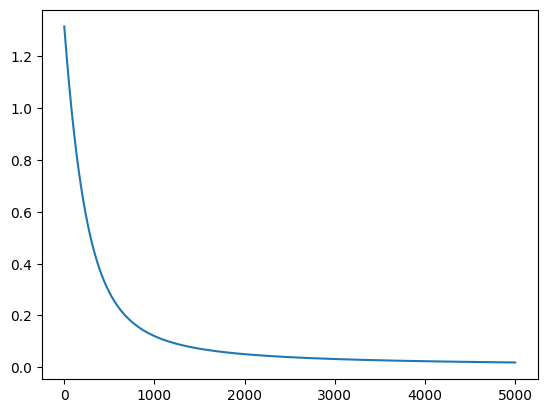

In [21]:
plt.plot(error_hist)

#### Test

In [29]:
y_test = y_test.to_numpy().reshape(-1, 1)
y_hat = logistic_regression(test_normalized_data, w)
accuracy(y_test, y_hat)

1.0

In [ ]:
error_hist1 = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(test_normalized_data, w)

    # loss
    e = bce(y_test, y_hat)
    error_hist1.append(e)

    # gradients
    grads = gradient(test_normalized_data, y_test, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) % 1 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

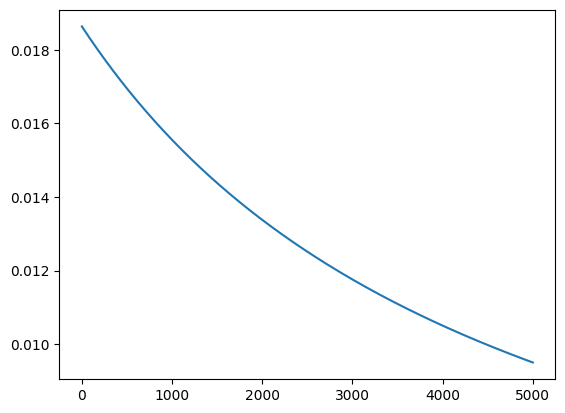

In [31]:
plt.plot(error_hist1)

In [ ]:
y_hat, y_test

In [33]:
# Calculate accuracy
def accuracy(y_true, y_pred):
    y_pred = np.round(y_pred)
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total = len(y_true)
    return correct / total

# Calculate precision
def precision(y_true, y_pred):
    y_pred = np.round(y_pred)
    true_positive = sum(1 for true, pred in zip(y_true, y_pred) if true == pred == 1)
    false_positive = sum(1 for true, pred in zip(y_true, y_pred) if true != pred == 1)
    return true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0

# Calculate recall
def recall(y_true, y_pred):
    y_pred = np.round(y_pred)
    true_positive = sum(1 for true, pred in zip(y_true, y_pred) if true == pred == 1)
    false_negative = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 0)
    return true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0

# Calculate F1 score
def f1_score(y_true, y_pred):
    y_pred = np.round(y_pred)
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) != 0 else 0


acc = accuracy(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
pre = precision(y_test, y_hat)
rec = recall(y_test, y_hat)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", pre)
print("Recall:", rec)


Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


In [34]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [43]:
model1 = LogisticRegression(solver='sag', max_iter=200, random_state=64)
model1.fit(train_normalized_data, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=200, random_state=64, solver='sag')

In [ ]:
model.predict_proba(test_normalized_data)

In [45]:
model1.score(train_normalized_data, y_train)

1.0

In [46]:
model1.score(test_normalized_data, y_test)

1.0

In [54]:
model2 = SGDClassifier(loss='log_loss', random_state=64)
model2.fit(train_normalized_data, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', random_state=64)

In [55]:
model2.score(train_normalized_data, y_train)

1.0

In [56]:
model2.score(test_normalized_data, y_test)

1.0

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
yhat1 = model1.predict(test_normalized_data)
yhat2 = model2.predict(test_normalized_data)
model1_report = classification_report(y_test,yhat1)
model2_report = classification_report(y_test,yhat2)
print(model1_report)
print(model2_report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        51
         1.0       1.00      1.00      1.00        49

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        51
         1.0       1.00      1.00      1.00        49

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



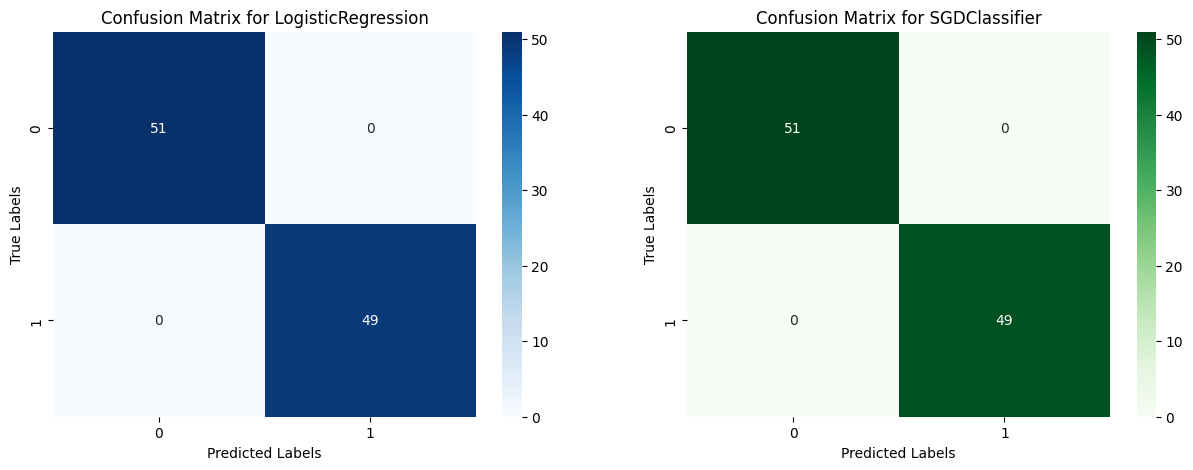

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


cm1 = confusion_matrix(y_test, yhat1)
cm2 = confusion_matrix(y_test, yhat2)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm1, ax=ax[0], annot=True, fmt='d', cmap='Blues')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
ax[0].set_title('Confusion Matrix for LogisticRegression')

sns.heatmap(cm2, ax=ax[1], annot=True, fmt='d', cmap='Greens')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')
ax[1].set_title('Confusion Matrix for SGDClassifier')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

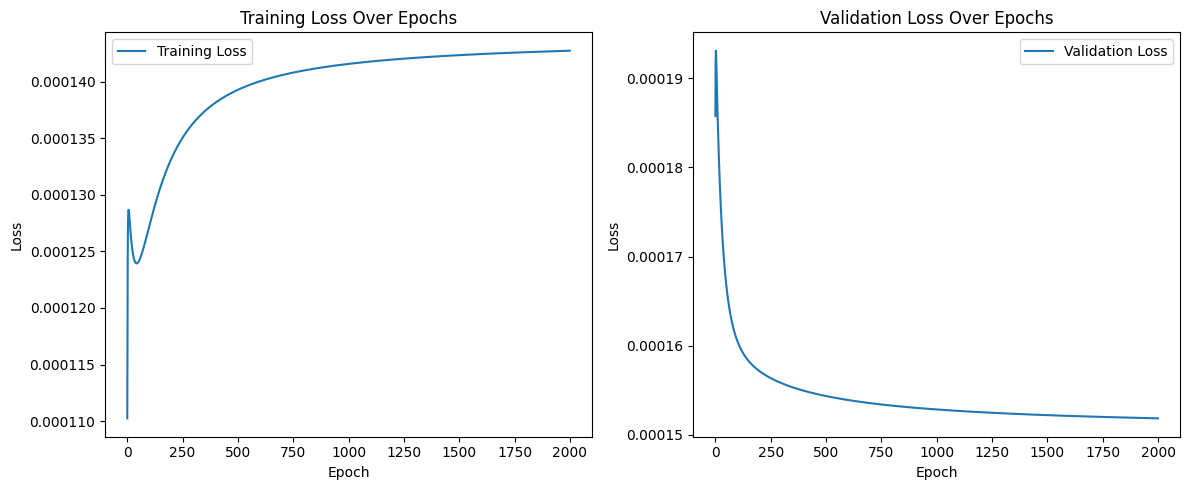

In [59]:
train_losses = []
test_losses = []

# Training loop
n_epochs = 2000
for epoch in range(n_epochs):
    # Train the model
    model2.partial_fit(train_normalized_data, y_train, classes=np.unique(y_train))

    # Compute training and validation loss
    train_loss = log_loss(y_train, model2.predict_proba(train_normalized_data))
    test_loss = log_loss(y_test, model2.predict_proba(test_normalized_data))

    # Record the loss values
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the training loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot the validation loss values
plt.subplot(1, 2, 2)
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

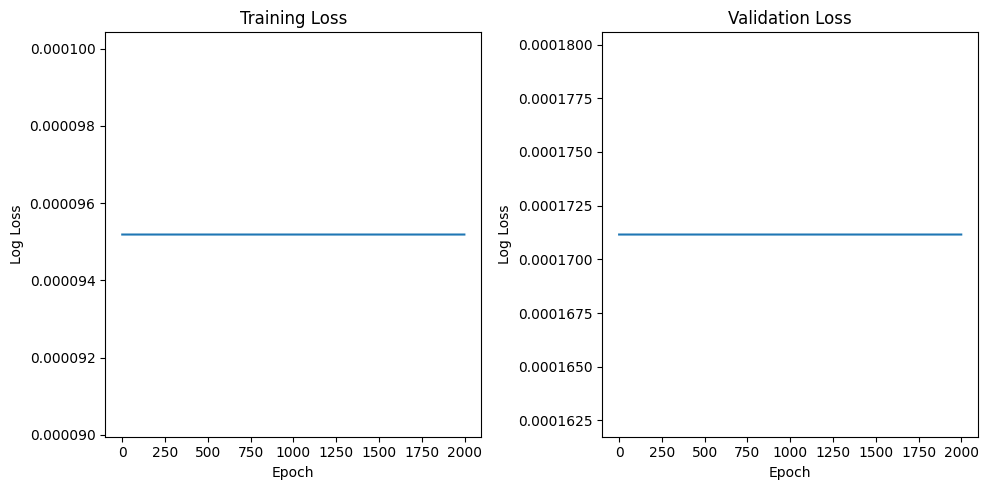

In [60]:
train_losses = []
test_losses = []

n_epochs = 2000
for epoch in range(n_epochs):

    model2.fit(train_normalized_data, y_train)

    train_loss = log_loss(y_train, model2.predict_proba(train_normalized_data))
    test_loss = log_loss(y_test, model2.predict_proba(test_normalized_data))

    train_losses.append(train_loss)
    test_losses.append(test_loss)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')

plt.subplot(1, 2, 2)
plt.plot(range(n_epochs), test_losses, label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')

plt.tight_layout()
plt.show()